# Image labeling

This code will utiliz the custom trainede yolo8 modle to do predictions on a give picture

In [5]:
# Import the necessary libraries
import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
# Path configuration - EDIT THESE PATHS AS NEEDED
HOME = os.getcwd()  # Your project root directory
MODEL_PATH = os.path.join(HOME, "runs", "detect", "train", "weights", "best.pt")  # Path to your trained model
TEST_IMAGE_PATH = os.path.join(HOME, "Data_test_pics", "TP6.jpg")  # <-- REPLACE WITH YOUR IMAGE PATH

In [7]:
# Load your custom trained model
model = YOLO(MODEL_PATH)


image 1/1 c:\Users\lau21\Desktop\8. semester\FINIL_MINI\VT2_MINI_FINAL-main\Data_test_pics\TP6.jpg: 640x640 4 1s, 4 2s, 3 3s, 4 4s, 2 5s, 2 6s, 209.8ms
Speed: 47.0ms preprocess, 209.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to test_outputs\predictions


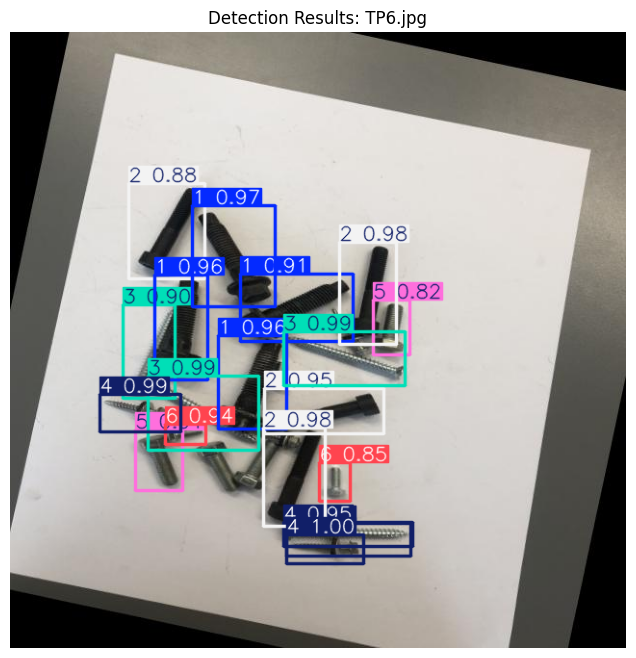


Detection Summary:
Image: TP6.jpg
Objects detected: 19
1. 4: 1.00 confidence
2. 4: 0.99 confidence
3. 3: 0.99 confidence
4. 3: 0.99 confidence
5. 2: 0.98 confidence
6. 2: 0.98 confidence
7. 1: 0.97 confidence
8. 1: 0.96 confidence
9. 1: 0.96 confidence
10. 2: 0.95 confidence
11. 4: 0.95 confidence
12. 6: 0.94 confidence
13. 1: 0.91 confidence
14. 5: 0.91 confidence
15. 3: 0.90 confidence
16. 4: 0.89 confidence
17. 2: 0.88 confidence
18. 6: 0.85 confidence
19. 5: 0.82 confidence

Results saved to: test_outputs\predictions


In [8]:
# The predict_and_display function runs object detection on a single image using the custom trained yolo model, displays the results with bounding boxes, prints a summary of detected objects, 
# and optionally saves the output image to a specified folder.
#For conf see not directly beow but furthere below
def predict_and_display(image_path, save=True, conf=0.50, output_dir="test_outputs"):
    """
    Predict on a single image and display results
    
    Args:
        image_path (str): Absolute or relative path to the image file
        save (bool): Whether to save the prediction (saves to output_dir)
        conf (float): Confidence threshold (0-1)
        output_dir (str): Directory to save results (created if doesn't exist)
    """
    # Verify image exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found at: {image_path}")
    
    # Create output directory if needed
    os.makedirs(output_dir, exist_ok=True)
    
    # Run prediction
    results = model.predict(
        source=image_path,
        conf=conf,
        save=save,
        project=output_dir,
        name="predictions",
        exist_ok=True
    )
    
    # Display results
    for r in results:
        # Get image with bounding boxes
        im_array = r.plot()  # BGR numpy array
        im = Image.fromarray(im_array[..., ::-1])  # Convert to RGB PIL image
        
        # Show image
        plt.figure(figsize=(12, 8))
        plt.imshow(im)
        plt.title(f"Detection Results: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()
        
        # Print detection info
        print("\nDetection Summary:")
        print(f"Image: {os.path.basename(image_path)}")
        print(f"Objects detected: {len(r.boxes)}")
        
        for i, box in enumerate(r.boxes, 1):
            print(f"{i}. {model.names[int(box.cls)]}: {box.conf.item():.2f} confidence")
    
    print(f"\nResults saved to: {os.path.join(output_dir, 'predictions')}")

# Example usage - EDIT THE IMAGE PATH HERE
predict_and_display(
    image_path=TEST_IMAGE_PATH,  # <-- REPLACE THIS WITH YOUR IMAGE PATH
    save=True,
    conf=0.8  # Confidence threshold (adjust as needed)
) 